In [ ]:
%tensorflow_version 1.x

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

TensorFlow 1.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import sys
projectDir = "/content/drive/My Drive/code/git/tweepfake_deepfake_text_detection"
sys.path.insert(0, projectDir)

random_state = 523 # Fixed seed for replicability of randomic operations.
resultsDir = projectDir+"/data/results"

In [ ]:
!pip install pandas keras

In [ ]:
from DataHandler import DataHandler

csvTrainDataset = projectDir+"/data/splits/train.csv"
csvValDataset = projectDir+"/data/splits/validation.csv"
csvTestDataset = projectDir+"/data/splits/test.csv"

charDir = projectDir+"/data/encoded/char"
dh = DataHandler()
dfTrain = dh.readCSVData(csvTrainDataset)
dfVal = dh.readCSVData(csvValDataset)
dfTest = dh.readCSVData(csvTestDataset)

In [ ]:
dfTrain

,N_prog,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,quote_count,reply_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,...,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,created,data.tweet,ora.tweet,tweet_type,mention_TF,hashtag_TF,url_TF,n.words,punct,account.type,finetuning_source,class_type
0,14692,x1110407881030017024,x1208265880146046976,2019-12-21 06:00:08,imranyebot,YEA now that note GOOD,imranye-twitter-bot,22,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/imranyebot/status/12082658...,imranyebot,NaN,@imranye in robot form. tweets every hour gene...,NaN,False,29,3,0,7467,0,2019-03-26 05:07:23,False,NaN,NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/1110408254...,2019-12-21 06:00:08,2019-12-21,06:00:08,tweet,False,False,False,5,0,bot,imranye,others
1,22336,x3171109449,x1091463908118941696,2019-02-01 22:30:48,zawvrk,Listen to This Charming Man by The Smiths htt...,Twitter for iPhone,66,NaN,NaN,NaN,False,False,4,0,NaN,NaN,NaN,NaN,soundcloud.com/thesmiths/this…,https://t.co/r12OIXkfUO,https://soundcloud.com/thesmiths/this-charming...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/zawvrk/status/109146390811...,zawar,NaN,gold experience,https://t.co/J60plTSsKt,False,558,274,8,12216,23633,2015-04-15 19:50:16,False,https://t.co/J60plTSsKt,https://www.instagram.com/zawvr,NaN,https://pbs.twimg.com/profile_banners/31711094...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1229957200...,2019-02-01 22:30:48,2019-02-01,22:30:48,tweet,False,False,True,13,3,human,original,human
2,24087,x1110686081341632512,x1199055191028293633,2019-11-25 20:00:09,zawarbot,wish i can i would be seeing other hoes on the...,zawar-twitter-bot,57,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/zawarbot/status/1199055191...,zawarbot,NaN,I’m an AI Bot that tries to tweet like @zawvrk...,NaN,False,13,7,0,4054,9,2019-03-26 23:32:52,False,NaN,NaN,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1185589257...,2019-11-25 20:00:09,2019-11-25,20:00:09,tweet,False,False,False,13,0,bot,zawvrk,others
3,7584,x1110307772783124480,x1214698264701722626,2020-01-08 00:00:08,ahadsheriffbot,The decade in the significantly easier schedul...,ahadsheriff-bot,63,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/ahadsheriffbot/status/1214...,Robot Ahad Sheriff,NaN,@ahadsheriff in robot form. tweets every hour ...,https://t.co/2G243YsNOt,False,18,1,0,7946,0,2019-03-25 22:29:36,False,https://t.co/2G243YsNOt,https://ahadsheriff.com,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1110311752...,2020-01-08 00:00:08,2020-01-08,00:00:08,tweet,Fa

In [ ]:
# Select interesting columns for this study.
dfTrainDataset = dfTrain[["screen_name", "text", "account.type"]]
dfValDataset = dfVal[["screen_name", "text", "account.type"]]
dfTestDataset = dfTest[["screen_name", "text", "account.type"]]

In [ ]:
dfTrainDataset

,screen_name,text,account.type
0,imranyebot,YEA now that note GOOD,bot
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human
2,zawarbot,wish i can i would be seeing other hoes on the...,bot
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot
...,...,...,...
20707,AINarendraModi,Met on the Abversion of our science for the co...,bot
20708,AINarendraModi,Land for their during the opportunity to the p...,bot
20709,DeepDrumpf,@TayandYou doesn't have a clue. You're right. ...,bot
20710,jaden,Me And My Bestie https://t.co/vPq2iDkWZm,human


In [ ]:
import os
from numpy import savetxt
from numpy import loadtxt
from KerasModels import generateExpData


tokenizer = None
train_features, tokenizer = generateExpData(dfTrainDataset, tokenizer = tokenizer)
val_features, tokenizer = generateExpData(dfValDataset, tokenizer = tokenizer)
test_features, tokenizer = generateExpData(dfTestDataset, tokenizer = tokenizer)

Using TensorFlow backend.


In [ ]:

X_train_all = dfTrainDataset
X_val_all = dfValDataset
X_test_all = dfTestDataset
dictLabels = {"human":0, "bot":1}
dictLabelsReverse = {0:"human", 1: "bot"}
y_train = dfTrainDataset["account.type"].apply(lambda x: dictLabels[x])
y_val = dfValDataset["account.type"].apply(lambda x: dictLabels[x])
y_test = dfTestDataset["account.type"].apply(lambda x: dictLabels[x])


In [ ]:
train_labels = y_train.tolist()
val_labels = y_val.tolist()
test_labels = y_test.tolist()

In [ ]:
from KerasModels import buildCharCNNModel

# Build char CNN network.
vocab_size = len(tokenizer.word_index)
model = buildCharCNNModel(vocab_size, embSize=32, inputSize=320)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 320)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 320, 32)      3456        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 318, 128)     12416       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D

In [ ]:
# Train CNN model.
model.fit(train_features, train_labels, batch_size=256, epochs=25, validation_data=(val_features, val_labels))


Train on 20712 samples, validate on 2302 samples
Epoch 1/25
20712/20712 [==============================] - 10s 462us/step - loss: 0.5643 - accuracy: 0.7100 - val_loss: 0.4713 - val_accuracy: 0.7698
Epoch 2/25
20712/20712 [==============================] - 2s 94us/step - loss: 0.4205 - accuracy: 0.8026 - val_loss: 0.4137 - val_accuracy: 0.7941
Epoch 3/25
20712/20712 [==============================] - 2s 93us/step - loss: 0.3832 - accuracy: 0.8206 - val_loss: 0.3917 - val_accuracy: 0.8158
Epoch 4/25
20712/20712 [==============================] - 2s 95us/step - loss: 0.3659 - accuracy: 0.8279 - val_loss: 0.3770 - val_accuracy: 0.8254
Epoch 5/25
20712/20712 [==============================] - 2s 94us/step - loss: 0.3529 - accuracy: 0.8364 - val_loss: 0.3691 - val_accuracy: 0.8310
Epoch 6/25
20712/20712 [==============================] - 2s 95us/step - loss: 0.3439 - accuracy: 0.8415 - val_loss: 0.3630 - val_accuracy: 0.8375
Epoch 7/25
20712/20712 [==============================] - 2s 95us/

In [ ]:
y_pred_char_cnn_prob = model.predict(test_features)
y_pred_char_cnn = (y_pred_char_cnn_prob > 0.5)
def toBoolValue(v):
  if v == True:
    return 1
  else:
    return 0
y_pred_char_cnn = [toBoolValue(t) for t in y_pred_char_cnn]

In [ ]:
import pandas as pd

predictionLabels = [dictLabelsReverse[t] for t in y_pred_char_cnn]
dfResults = pd.DataFrame(predictionLabels, columns=["prediction"])
dfResults["gold"] = dfTestDataset[["account.type"]]
file_name = resultsDir+"/char_cnn.csv"
dfResults.to_csv(file_name, sep='\t', encoding='utf-8')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred_char_cnn, digits=3))

              precision    recall  f1-score   support

           0      0.896     0.794     0.842      1278
           1      0.815     0.908     0.859      1280

    accuracy                          0.851      2558
   macro avg      0.856     0.851     0.851      2558
weighted avg      0.856     0.851     0.851      2558



In [ ]:
X_test_all["label_char_cnn"] = [dictLabelsReverse[t] for t in y_pred_char_cnn]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def plotErrorRatio(X_test_all, prediction_column, min_sample_num=30):
  X_verify = X_test_all[["screen_name", "text", "account.type", prediction_column]]
  X_count_accounts = X_test_all[["screen_name", "account.type"]].groupby("screen_name").count()
  X_verify = X_verify[X_verify["account.type"] != X_verify[prediction_column]]
  X_verify = X_verify.groupby("screen_name").count()["text"].to_frame()
  X_verify["total"] = X_count_accounts["account.type"]
  X_verify.columns = ["errors", "num_samples"]
  X_verify["error_ratio"] = X_verify["errors"] / X_verify["num_samples"]
  X_verify[X_verify["num_samples"] >= min_sample_num]["error_ratio"].plot.bar(figsize=(15,5))
  return X_verify

,errors,num_samples,error_ratio
screen_name,,,
AINarendraModi,7,125,0.056000
DeepDrumpf,1,29,0.034483
GenePark,2,22,0.090909
GenePark_GPT2,4,22,0.181818
Gpt2Wint,2,2,1.000000
JustinTrudeau,6,51,0.117647
Musk_from_Mars,2,2,1.000000
Thorin,3,10,0.300000
UtilityLimb,3,4,0.750000


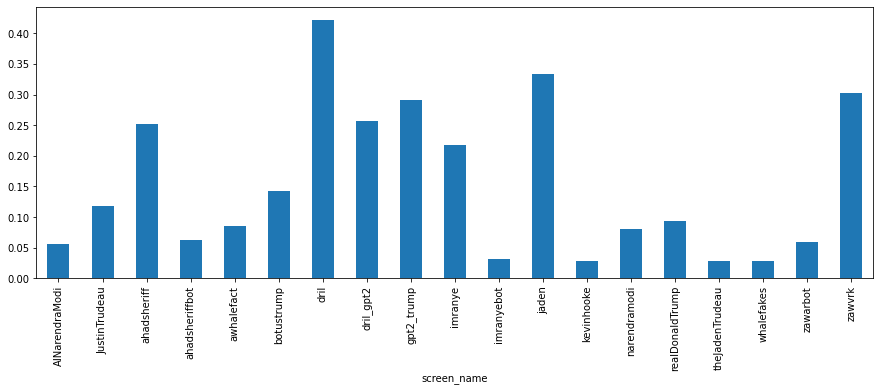

In [ ]:
plotErrorRatio(X_test_all, "label_char_cnn", min_sample_num=30)

In [ ]:
from KerasModels import buildCharGRUModel


# Build char GRU network.
vocab_size = len(tokenizer.word_index)
model = buildCharGRUModel(vocab_size, embSize=32, inputSize=320)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 320)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 320, 32)           3456      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1024)              1674240   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 1,678,721
Trainable params: 1,678,721
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Train LSTM model.
model.fit(train_features, train_labels, batch_size=256, epochs=25, validation_data=(val_features, val_labels))

Train on 20712 samples, validate on 2302 samples
Epoch 1/25
20712/20712 [==============================] - 66s 3ms/step - loss: 0.6496 - accuracy: 0.6018 - val_loss: 0.6028 - val_accuracy: 0.6216
Epoch 2/25
20712/20712 [==============================] - 64s 3ms/step - loss: 0.5902 - accuracy: 0.6381 - val_loss: 0.5862 - val_accuracy: 0.6520
Epoch 3/25
20712/20712 [==============================] - 64s 3ms/step - loss: 0.5848 - accuracy: 0.6623 - val_loss: 0.5872 - val_accuracy: 0.6512
Epoch 4/25
20712/20712 [==============================] - 64s 3ms/step - loss: 0.5824 - accuracy: 0.6496 - val_loss: 0.5821 - val_accuracy: 0.6490
Epoch 5/25
20712/20712 [==============================] - 64s 3ms/step - loss: 0.5784 - accuracy: 0.6548 - val_loss: 0.5767 - val_accuracy: 0.6616
Epoch 6/25
20712/20712 [==============================] - 64s 3ms/step - loss: 0.5131 - accuracy: 0.7255 - val_loss: 0.4391 - val_accuracy: 0.7854
Epoch 7/25
20712/20712 [==============================] - 65s 3ms/ste

In [ ]:
y_pred_char_lstm_prob = model.predict(test_features)
y_pred_char_lstm = (y_pred_char_lstm_prob > 0.5)
def toBoolValue(v):
  if v == True:
    return 1
  else:
    return 0
y_pred_char_lstm = [toBoolValue(t) for t in y_pred_char_lstm]

In [ ]:
import pandas as pd

predictionLabels = [dictLabelsReverse[t] for t in y_pred_char_lstm]
dfResults = pd.DataFrame(predictionLabels, columns=["prediction"])
dfResults["gold"] = dfTestDataset[["account.type"]]
file_name = resultsDir+"/char_gru.csv"
dfResults.to_csv(file_name, sep='\t', encoding='utf-8')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred_char_lstm, digits=3))

              precision    recall  f1-score   support

           0      0.899     0.743     0.814      1278
           1      0.781     0.916     0.844      1280

    accuracy                          0.830      2558
   macro avg      0.840     0.830     0.829      2558
weighted avg      0.840     0.830     0.829      2558



In [ ]:
X_test_all["label_char_lstm"] = [dictLabelsReverse[t] for t in y_pred_char_lstm]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,errors,num_samples,error_ratio
screen_name,,,
AINarendraModi,9,125,0.072000
DeepDrumpf,4,29,0.137931
GenePark,1,22,0.045455
GenePark_GPT2,3,22,0.136364
Gpt2Wint,1,2,0.500000
JustinTrudeau,2,51,0.039216
Musk_from_Mars,1,2,0.500000
Thorin,1,10,0.100000
UtilityLimb,4,4,1.000000


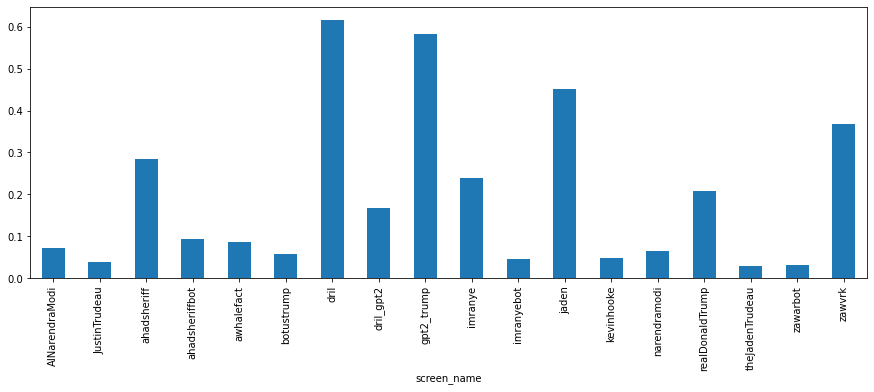

In [ ]:
plotErrorRatio(X_test_all, "label_char_lstm", min_sample_num=30)

In [ ]:
# Build char CNN+GRU network.
from KerasModels import buildCharCNNAndGRUModel
vocab_size = len(tokenizer.word_index)
model = buildCharCNNAndGRUModel(vocab_size, embSize=32, inputSize=320)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 320)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 320, 32)      3456        input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 318, 128)     12416       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 317, 128)     16512       embedding_3[0][0]                
____________________________________________________________________________________________

In [ ]:
# Train LSTM model.
model.fit(train_features, train_labels, batch_size=256, epochs=25, validation_data=(val_features, val_labels))

Train on 20712 samples, validate on 2302 samples
Epoch 1/25
20712/20712 [==============================] - 68s 3ms/step - loss: 0.6216 - accuracy: 0.7150 - val_loss: 0.4711 - val_accuracy: 0.7767
Epoch 2/25
20712/20712 [==============================] - 66s 3ms/step - loss: 0.4180 - accuracy: 0.8057 - val_loss: 0.4179 - val_accuracy: 0.7971
Epoch 3/25
20712/20712 [==============================] - 67s 3ms/step - loss: 0.3848 - accuracy: 0.8197 - val_loss: 0.3949 - val_accuracy: 0.8084
Epoch 4/25
20712/20712 [==============================] - 66s 3ms/step - loss: 0.3666 - accuracy: 0.8304 - val_loss: 0.3809 - val_accuracy: 0.8275
Epoch 5/25
20712/20712 [==============================] - 66s 3ms/step - loss: 0.3559 - accuracy: 0.8357 - val_loss: 0.3699 - val_accuracy: 0.8328
Epoch 6/25
20712/20712 [==============================] - 65s 3ms/step - loss: 0.3459 - accuracy: 0.8418 - val_loss: 0.3670 - val_accuracy: 0.8293
Epoch 7/25
20712/20712 [==============================] - 66s 3ms/ste

In [ ]:
y_pred_char_cnngru_prob = model.predict(test_features)
y_pred_char_cnngru_prob = (y_pred_char_cnngru_prob > 0.5)
def toBoolValue(v):
  if v == True:
    return 1
  else:
    return 0
y_pred_char_cnngru_prob = [toBoolValue(t) for t in y_pred_char_cnngru_prob]

In [ ]:
import pandas as pd

predictionLabels = [dictLabelsReverse[t] for t in y_pred_char_cnngru_prob]
dfResults = pd.DataFrame(predictionLabels, columns=["prediction"])
dfResults["gold"] = dfTestDataset[["account.type"]]
file_name = resultsDir+"/char_cnngru.csv"
dfResults.to_csv(file_name, sep='\t', encoding='utf-8')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred_char_cnngru_prob, digits=3))

              precision    recall  f1-score   support

           0      0.848     0.820     0.834      1278
           1      0.826     0.853     0.839      1280

    accuracy                          0.837      2558
   macro avg      0.837     0.837     0.837      2558
weighted avg      0.837     0.837     0.837      2558



In [ ]:
X_test_all["label_char_cnngru"] = [dictLabelsReverse[t] for t in y_pred_char_cnngru_prob]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,errors,num_samples,error_ratio
screen_name,,,
AINarendraModi,10,125,0.080000
DeepDrumpf,2,29,0.068966
GenePark,1,22,0.045455
GenePark_GPT2,6,22,0.272727
Gpt2Wint,2,2,1.000000
JustinTrudeau,2,51,0.039216
Musk_from_Mars,1,2,0.500000
Thorin,1,10,0.100000
UtilityLimb,3,4,0.750000


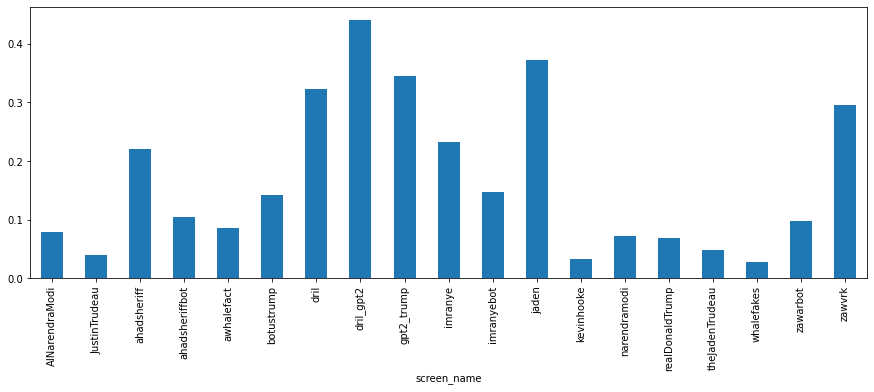

In [ ]:
plotErrorRatio(X_test_all, "label_char_cnngru", min_sample_num=30)